# Checking current directory
and changing current directory

In [67]:
import os 

current_directory = os.getcwd()
print(current_directory)

os.chdir("/home/ubuntu/projects/vault-76/entrance/src/benchmark/")
current_directory = os.getcwd()
print(f"Changed directory to {current_directory}")

/home/ubuntu/projects/vault-76/entrance/src/benchmark
Changed directory to /home/ubuntu/projects/vault-76/entrance/src/benchmark


# Bar Plot

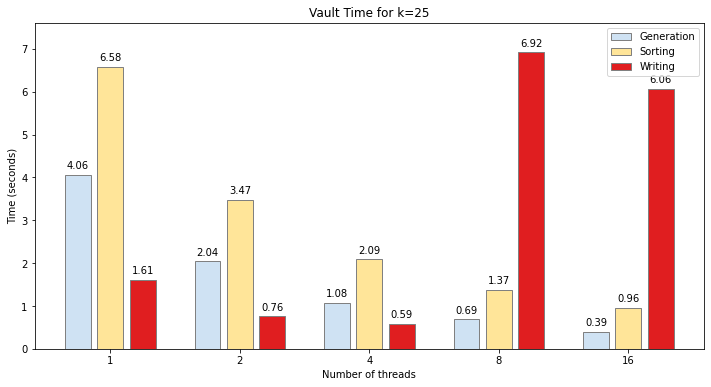

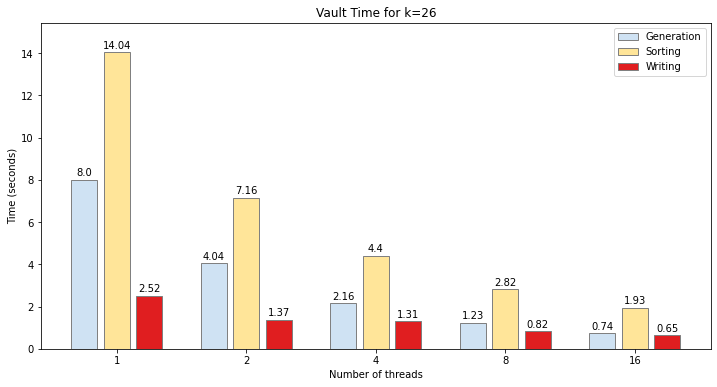

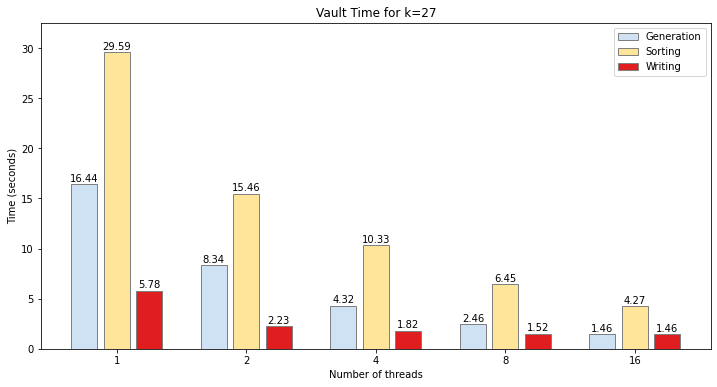

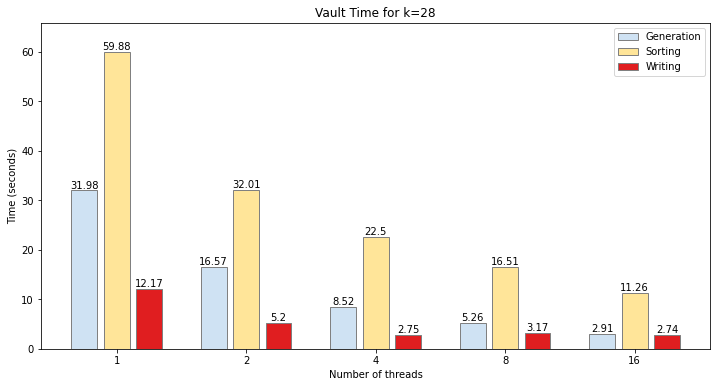

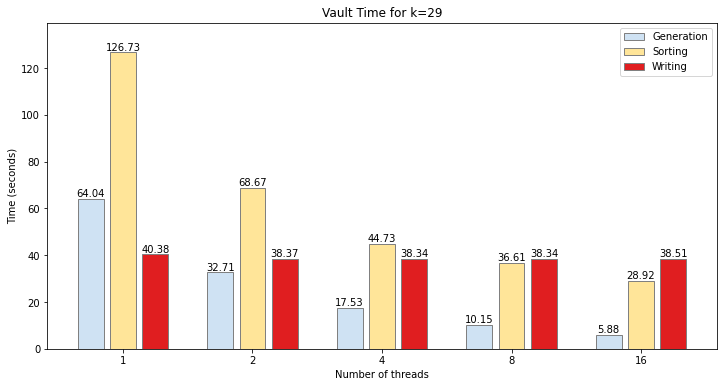

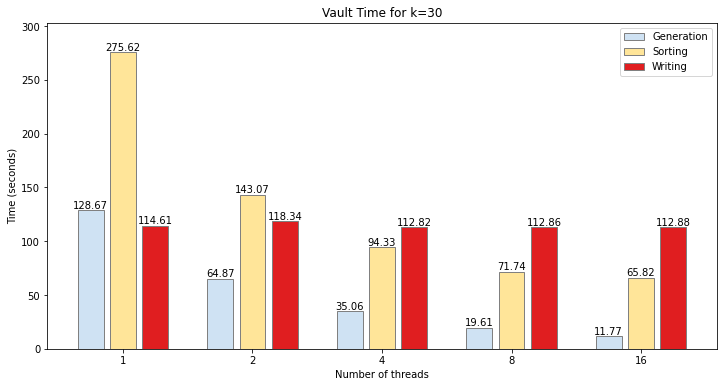

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

def strip_last(time): 
    if time[-2:] == "ms":
        time = float(time[:-2]) / 1000
        return time
        
    elif time[-1:] == "s":
        time = float(time[:-1])
        return time

for k in range(25, 31):
    threads = [1, 2, 4, 8, 16]
    bar_width = 0.2

    plt.figure(figsize=(12,6))
    
    plt.xlabel("Number of threads")
    plt.ylabel("Time (seconds)")
    plt.title(f"Vault Time for k={k}")
    plt.xticks(ticks=list(range(len(threads))), labels=threads) 
        
    for thread_num in threads:
        csv_file = f"vault_csv/vault_{thread_num}t_{k}.csv"
        
        df = pd.read_csv(csv_file)
        
        df["Generation"] = df["Generation"].apply(strip_last)
        df["Sorting"] = df["Sorting"].apply(strip_last)
        df["Writing"] = df["Writing"].apply(strip_last)
                
        avg_gen_time = round(df["Generation"].mean(), 2)
        avg_sort_time = round(df["Sorting"].mean(), 2)
        avg_write_time = round(df["Writing"].mean(), 2)
                 
        plt.bar(threads.index(thread_num) - bar_width - 0.05, avg_gen_time, width=bar_width, color="#cfe2f3ff", edgecolor="grey", label="Generation")
        plt.bar(threads.index(thread_num), avg_sort_time, width=bar_width, color="#ffe599ff", edgecolor="grey", label="Sorting")
        plt.bar(threads.index(thread_num) + bar_width + 0.05, avg_write_time, width=bar_width, color="#e01e20", edgecolor="grey", label="Writing")

        plt.text(threads.index(thread_num) - bar_width - 0.05, avg_gen_time + 0.1, avg_gen_time, ha="center", va="bottom")
        plt.text(threads.index(thread_num), avg_sort_time + 0.1, avg_sort_time, ha="center", va="bottom")
        plt.text(threads.index(thread_num) + bar_width + 0.05, avg_write_time + 0.1, avg_write_time, ha="center", va="bottom")
        
        plt.margins(y=0.1)

    plt.legend(["Generation", "Sorting", "Writing"], loc='upper right')

    plt.savefig(f"vault_plot/vault_{k}.svg")